In [1]:
import os

In [2]:
current_dir = os.path.abspath('.')

In [3]:
data_path = "{}/data.csv".format(current_dir)
data_path

'/Users/axu/Code/axuProject/Learn/learn_python_machine_learning/data.csv'

In [47]:
import pandas as pd

In [48]:
cols = ["type_1", "type_2", "type_3", "type_4", "voice_number", "rule_number", "keywords_number", "execute_time"]
df = pd.read_csv(data_path, header=None, sep=",")
df.columns = cols

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

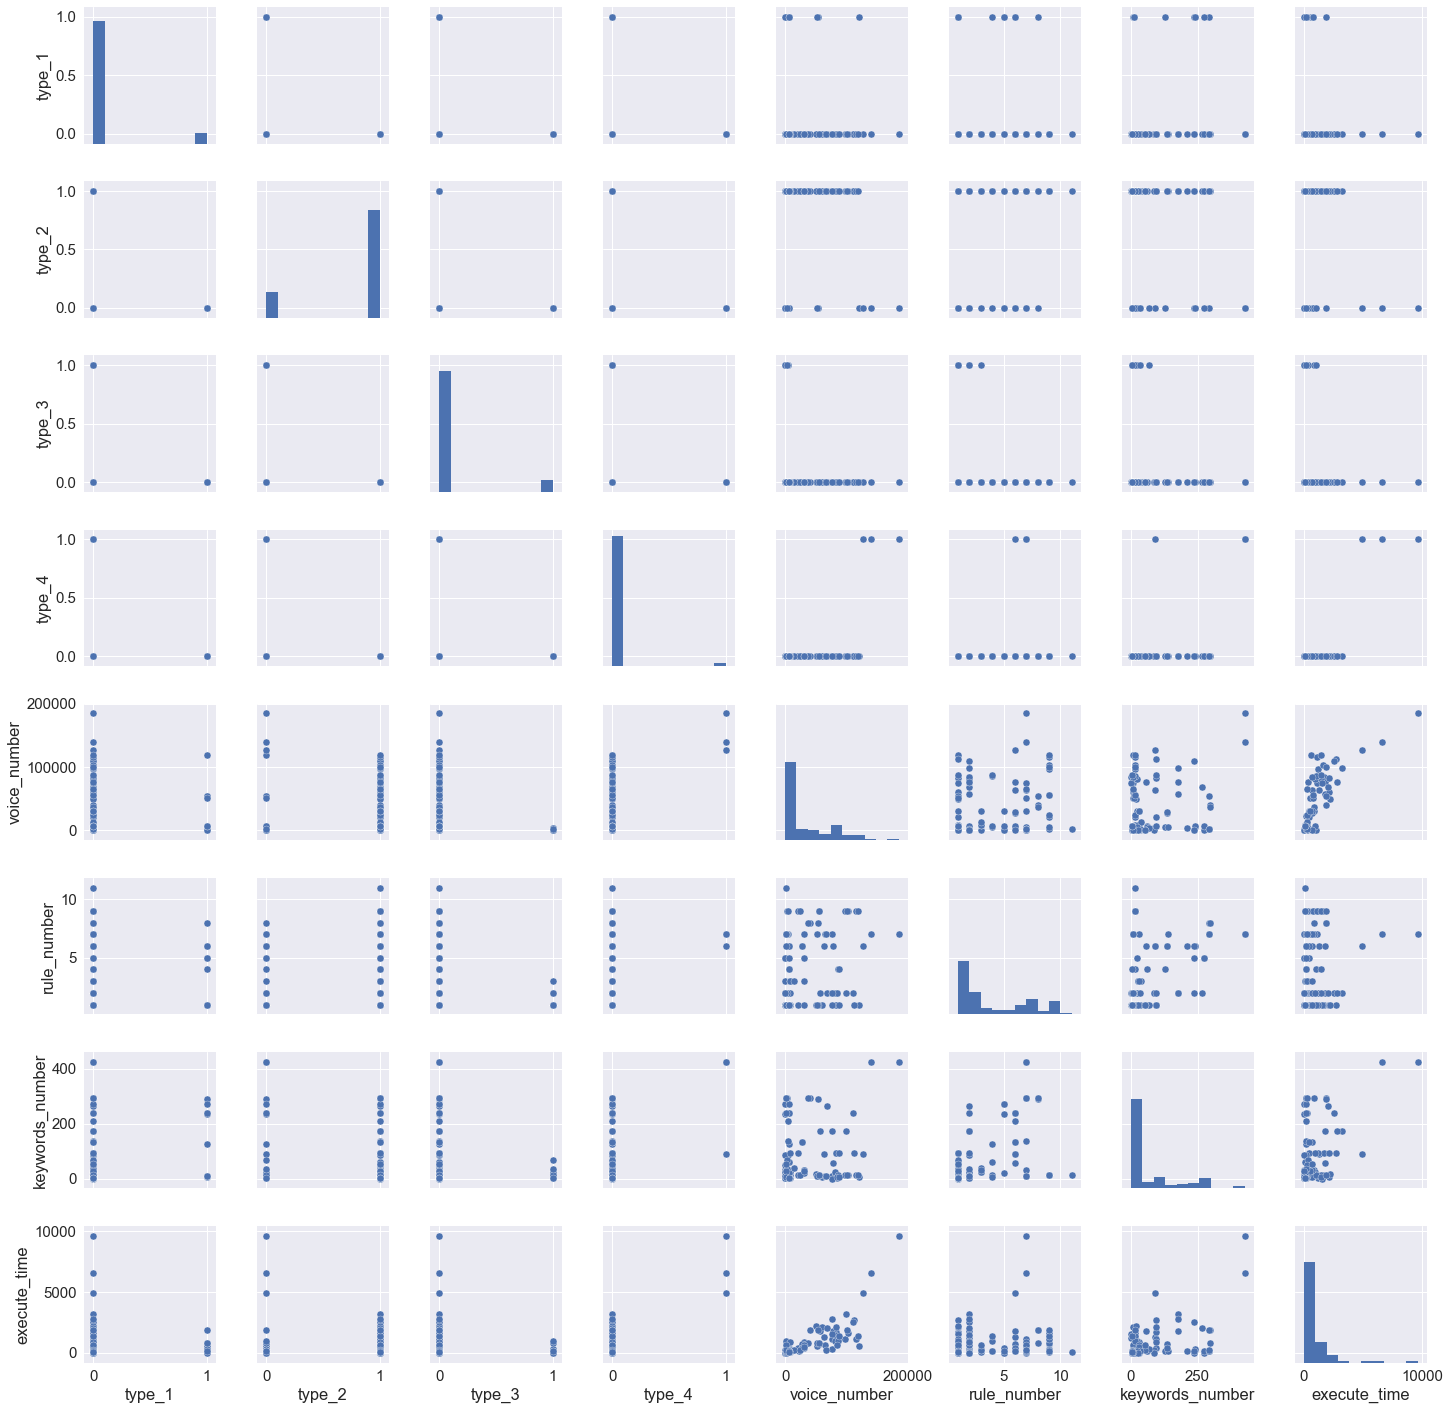

In [111]:
sns.pairplot(df[cols], size=2.5)

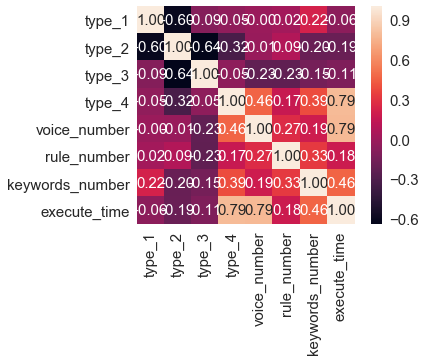

In [101]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
# 皮尔逊积矩阵相关系数
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt=".2f",
                annot_kws={"size": 15},
                yticklabels=cols,
                xticklabels=cols)

In [110]:
x = df[["voice_number", "keywords_number"]].values
y = df["execute_time"].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x, y)
data = [[300000, 200], [500000, 200]]
_df = pd.DataFrame(data)
slr.predict(_df)

array([ 7335.18963853, 11852.50849741])

In [53]:
x = df[["voice_number"]].values
y = df["execute_time"].values

In [54]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print("Slope: %.3f" % slr.coef_[0])
print("Lntercept: %.3f" % slr.intercept_)

Slope: 0.025
Lntercept: -42.009


In [56]:
def lin_regplot(X, Y, model):
    plt.scatter(X, Y, c="blue")
    plt.plot(X, model.predict(X), color="red")
    return None

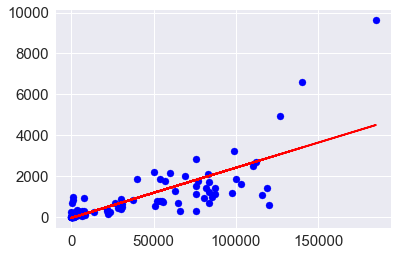

In [57]:
lin_regplot(x, y, slr)

In [84]:
x = df.iloc[:, :-1].values

In [85]:
y = df["execute_time"].values

In [81]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [61]:
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
y_train_pred = slr.predict(x_train)
y_test_pred = slr.predict(x_test)

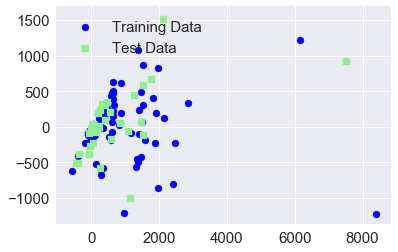

In [63]:
plt.scatter(y_train_pred, y_train_pred - y_train, c="blue", marker="o", label="Training Data")
plt.scatter(y_test_pred, y_test_pred - y_test, c="lightgreen", marker="s", label="Test Data")
plt.legend(loc="upper left")

In [64]:
from sklearn.metrics import r2_score
print("R^2 train: %.3f" % r2_score(y_train, y_train_pred))
print("R^2 test: %.3f" % r2_score(y_test, y_test_pred))

R^2 train: 0.900
R^2 test: 0.853


In [86]:
slr = LinearRegression()
slr.fit(x, y)
# ["type_1", "type_2", "type_3", "type_4", "voice_number", "rule_number", "keywords_number", "execute_time"]
data = [[0, 0, 0, 1, 300000, 1, 200], [0, 0, 1, 0, 500000, 1, 200]]
_df = pd.DataFrame(data)
slr.predict(_df)

array([9632.77264064, 9738.5809294 ])

In [91]:
from sklearn.tree import DecisionTreeRegressor
x = df[["voice_number"]].values
y = df["execute_time"].values

In [95]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

array([9623., 9623.])

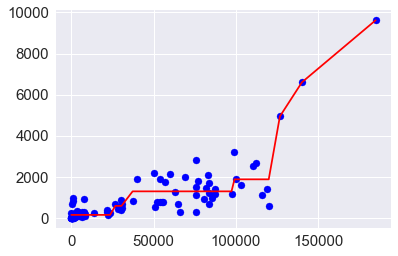

In [97]:
sort_idx = x.flatten().argsort()
lin_regplot(x[sort_idx], y[sort_idx], tree)
tree

data = [[300000], [500000]]
_df = pd.DataFrame(data)
tree.predict(_df)

In [108]:
# x = df.iloc[:, :-1].values
# y = df["execute_time"].values
# tree1 = DecisionTreeRegressor(max_depth=3)
# tree1.fit(x, y)
# data = [[0, 0, 0, 1, 300000, 1, 200], [0, 0, 1, 0, 500000, 1, 200]]
# _df = pd.DataFrame(data)
# tree1.predict(_df)

x = df[["voice_number", "keywords_number"]].values
y = df["execute_time"].values
tree1 = DecisionTreeRegressor(max_depth=3)
tree1.fit(x, y)
data = [[300000, 200], [500000, 200]]
_df = pd.DataFrame(data)
tree1.predict(_df)

array([9623., 9623.])